# Анализ рынка компьютерных игр


### Целью данной работы является:  
 выявить определяющие успешность игры закономерности,  
  что  позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  Работаем с данными по продаже игр на различных платформах. Для работы у нас есть названия игр, даты релизов, названия платформ, жанры, оценки критиков, оценки игроков и рейтинги ESRB и данные по продажам в разных регионах.

#### Пройдем по такому плану:  
 [1. Шаг 1. Откроем файл с данными и изучим общую информацию](#1-bullet)
 - посмотрим общую информацию
 - проверим на дубликаты 
 - напишем вывод  
 
[2. Шаг 2. Подготовим данные](#2-bullet)   
 - заменим названия столбцов
 - преобразуем данные 
 - проверим на пропуски
 - добавим столбец в суммарными объемами продаж  
 
[3. Шаг 3. Проведем исследовательский анализ данных](#3-bullet)   
 - посмотрим сколько игры и в какие годы реализовывалось
 - спрогнозируем будущий период
 - изучим популярные платформы и как они менялись во времени 
 - посмотрим есть ли зависимость от рейтингов критиков и игроков
 - посмотрим распределение по жанрам  
 
[4. Шаг 4. Составим портрет пользователя каждого региона](#4-bullet)   
 - посмотрим популярные платформы в регионах
 - посмотрим популярные жанры 
 - проверим влияет ли рейтинг ESRB на продажи  
 
[5. Шаг 5. Проверим гипотезы](#5-bullet)   
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Средние пользовательские рейтинги жанров Action и Sports разные  
 
[6. Общий вывод](#6-bullet)   

<a id='1-bullet'></a>

### Шаг 1. Откроем файл с данными и изучим общую информацию


<div class="alert alert-warning">
<h2> Комментарий ревьюера 3</h2>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.duplicated().sum()

0

##### Вывод по первичному знакомству с данными : 
1. Имеем 16713 значений 
2. Дубликатов нет 
3. Есть пропуски - разберемся с ними дальше 
4. Типы данных надо бы поменять  
 Year_of_Release на int  
  User_Score на float 
5. Пропуски в рейтингах возможны из за их крайне малого количества или же просто отсутствуют
6. Пропуски в годах релиза - возможно столь давние игры, что вносились в базу вручную и не все удаллось вывести
   
  


<a id='2-bullet'></a>

### Шаг 2. Подготовим данные



Перепишем названия столбцов к нижнему регистру

In [6]:
df = df.rename(columns={'Name': 'name', 'Platform': 'platform','Year_of_Release': 'year_of_release','Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales','Critic_Score': 'critic_score','User_Score': 'user_score','Rating': 'rating'})
df.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изменим типы данных :

year_of_release на Int64  
 user_score на float64, проверим сначала количество значений tbd


In [7]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Мысль по tbd - если оценки нет - возмможно игры не популярны и она близка к 0  
 таких значений 14% - удалим их путем замены типа данных и параметром errors='coerce'

In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] =  pd.to_numeric(df['user_score'], errors='coerce').astype('float64')
df.info()                                                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Посмотрим пропуски 

In [9]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Итак , имеем пропуски 
1. В названии игры - данные ничножно малы -   
 Удалим строки с пустыми значениями 
2. Год релиза - возможно датасет собирался намного позже и  
 на игры в давние времена не устанавливались правобладатели, поэтому нет точных данных по релизу.  
  Удалим, так как количество мало 
3. Жанр не установлен всего в двух строках  
 Удалим, так как количество мало 
4. Оценка критиков - не самы й важный параметр и поэтому отсутствует в базе. Оставим пропуски не тронутыми
5. Оценка пользователей - оставим не тронутыми пустые значение, так как значение пропусков достаточно велико и замена может исказить итоговые результаты. Так же возможно значени янастолько малы, что не ценятся системой. 
6. Рейтинг - если судить по первым 10 строчках датафрейма - то видим, что рейтинг пуст для игр до 2000х годов -  
 предположу, что его начали присваивать позже   
 Так как на разных платформах выходят одинаковые игры -  
 заполним пропуски в рейтинге значениями рейтинга с других платформ

In [10]:
df.isnull()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
16710,False,False,False,False,False,False,False,False,True,True,True
16711,False,False,False,False,False,False,False,False,True,True,True
16712,False,False,False,False,False,False,False,False,True,True,True
16713,False,False,False,False,False,False,False,False,True,True,True


Видим, что оценка критиков и оценка пользователей часто отсутсвуют вместе и рейтинг вместе с ними 

In [11]:
df.dropna(subset = ['name'],inplace = True)
df.dropna(subset = ['year_of_release'],inplace = True)
df.dropna(subset = ['genre'],inplace = True)
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [12]:
name_score = df.set_index("name")['rating'].to_dict()
def rating_fill(row):
    if pd.isna(row['rating']):
        return name_score.get(row['name'])
    return row['rating']
 
df['rating'] = df.apply(rating_fill, axis=1)
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6483
dtype: int64

+2,9 % данных по рейтингу все же получили  
 Так как рейтинг у нас это не число мы не можем посчитать для него ни среднее ни медиану -  
  оставим рейтинги в покое - как есть сейчас

Посчитаем суммарные продажи по каждому региону и внесем их в отдельный столбец

In [13]:
def sales_df(df):
    if df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']:
        return df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
    return df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['sales'] = df.apply(sales_df, axis = 1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


##### Вывод по подготовке данных  : 
1. Переписали наименования столбцов
2. Нашли и обезвредили пропуски, где это было возможно


<a id='3-bullet'></a>

### Шаг 3. Проведем исследовательский анализ данных


Посмотрим сколько игр выпускалось в разные годы

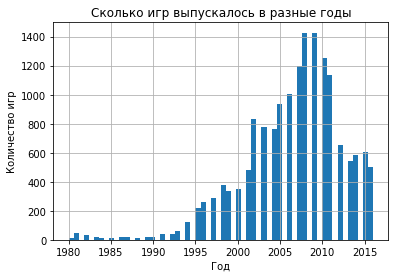

In [14]:
df.hist('year_of_release', bins = 60)
plt.title('Cколько игр выпускалось в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр');

По данным гистограммы видим :  
1. Количество игр начало расти в начале 90х
2. В период с 2006 по 2010 было много открытий в игровой индустрии
3. Пиковые значения где-то на уровне 2007-2009 года  - в период кризисов люди хотят уйти от реальности, погружаяся в видуманный мир. Работаю в гейм деве - немного в теме - работы в текущий кризис стало в десятки раз больше - индустрия на подъеме - так как наша задача скрасить быт наших игроков.  
 Предположу, эти данные нужны разработчикам, чтобы смотреть ретроспективу и ,  
  как все мы знаем, все новое - хорошо забытое старое, поэтому эти данные если развить (посмотреть жанры / конкретные айтемы / коммерческий успех) - нужны для прогноза на стадии продумывания нового продукта.  
   Спад же связан с тем, что выход из кризиса - все возвращаются в реальность )
 

Посмотрим как менялись продажи по платформам

In [15]:
sales_platform = df.pivot_table(index=['platform', 'year_of_release'], values=['sales'], aggfunc='sum').reset_index()
sales_platform.head(10)         

,platform,year_of_release,sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


In [16]:
sales_platform_pivot = sales_platform.pivot_table(index='platform', values='sales', aggfunc=('sum'))
sales_platform_pivot.sort_values(by='sales', ascending=False).head(10)

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Подсобрав данные видим, что топ по продажам у нас это платформы:  
 PS2, X360, PS3, Wii, DS 
 
 

Рассмотрим срез данных по годам с максимальным количеством реализованных игр

In [17]:
sales_platform= sales_platform.query('2006 < year_of_release < 2011').reset_index()
sales_platform.head(10)

,index,platform,year_of_release,sales
0,23,DC,2007,0.02
1,24,DC,2008,0.04
2,29,DS,2007,146.94
3,30,DS,2008,145.31
4,31,DS,2009,119.54
5,32,DS,2010,85.02
6,56,GBA,2007,3.40
7,63,GC,2007,0.27
8,109,PC,2007,9.28
9,110,PC,2008,12.42


Сгруппируем данные из среза по платформам и годам

In [18]:
sales_platform = sales_platform.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc=('sum')).reset_index()
sales_platform.head(10)

,platform,year_of_release,sales
0,DC,2007,0.02
1,DC,2008,0.04
2,DS,2007,146.94
3,DS,2008,145.31
4,DS,2009,119.54
5,DS,2010,85.02
6,GBA,2007,3.40
7,GC,2007,0.27
8,PC,2007,9.28
9,PC,2008,12.42


Визуализируем полученные данные 

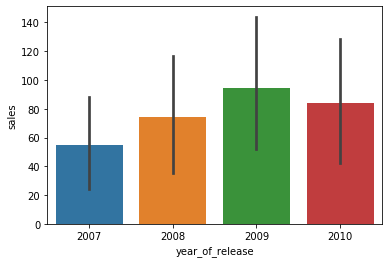

In [19]:
sns.barplot(x='year_of_release', y='sales', data=sales_platform);

Видим, что максимальные продажи по количеству были в 2009 году 

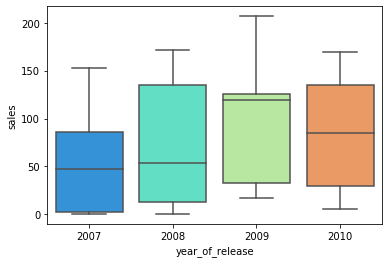

In [20]:
sns.boxplot(x='year_of_release', y='sales', data=sales_platform, palette='rainbow');

Больше реализовывались игры  в 2008 и 2010 годах

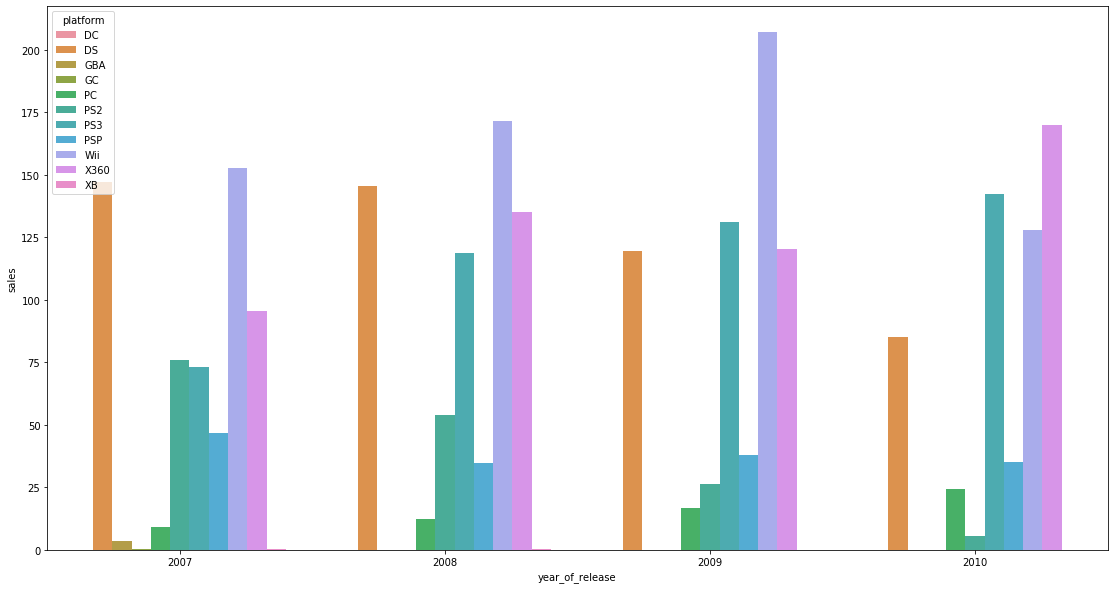

In [21]:
plt.figure(figsize=(19,10))
sns.barplot(x='year_of_release', y='sales', hue='platform', data=sales_platform)

За 5-6 лет платформа периживает взлет - успех - приземление

In [22]:
test = df.groupby('platform')['year_of_release'].unique()
years=0
 
for platform in test:
    years += len(platform)
 
print (years/len(test))

7.67741935483871


Мы посмотрели как зависели парметры в период максимальных продаж.  
 Теперь рассмотрим период 2010 - 2015 и спрогнозируем по ним данные на 2017  
  Так как за 2016 данные не полные - не будем брать их в расчет 

In [23]:
sales_platform_forecast = df.pivot_table(index=['platform', 'year_of_release'], values=['sales'], aggfunc='sum').reset_index()
sales_platform_forecast.head(10)   

,platform,year_of_release,sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


In [24]:
sales_platform_forecast = sales_platform_forecast.query('2010 < year_of_release < 2016')
sales_platform_forecast.head(10)

,platform,year_of_release,sales
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78
33,DS,2011,26.18
34,DS,2012,11.01
35,DS,2013,1.54
113,PC,2011,35.03
114,PC,2012,23.22


In [25]:
sales_platform_forecast['platform'].unique()

array(['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii',
       'WiiU', 'X360', 'XOne'], dtype=object)

In [26]:
sales_platform['platform'].unique()

array(['DC', 'DS', 'GBA', 'GC', 'PC', 'PS2', 'PS3', 'PSP', 'Wii', 'X360',
       'XB'], dtype=object)

Видим, что количество платформ станоновится меньше 

In [27]:
sales_platform_forecast['sales'].describe()

count     49.000000
mean      37.227959
std       40.114497
min        0.120000
25%       10.590000
50%       21.650000
75%       54.070000
max      156.780000
Name: sales, dtype: float64

In [28]:
sales_platform['sales'].describe()

count     34.000000
mean      74.270588
std       63.412543
min        0.020000
25%       13.542500
50%       63.545000
75%      130.185000
max      206.970000
Name: sales, dtype: float64

Cтоит учесть, что с 2010 года - период после кризиса и падение продаж ожидаемо.  
 При этом наблюдаем, что значение 1 квартиля выше  
  предположу, что это тенденция к росту продаж

Посмотрим популярные платформы для двух временных срезов

In [29]:
sales_platform_pivot = sales_platform.pivot_table(index='platform', values='sales', aggfunc=('sum'))
sales_platform_pivot.sort_values(by='sales', ascending=False).head(10)


,sales
platform,
Wii,659.01
X360,520.99
DS,496.81
PS3,464.81
PS2,161.93
PSP,154.30
PC,62.89
GBA,3.40
XB,0.73


In [30]:
sales_platform_forecast_pivot = sales_platform_forecast.pivot_table(index='platform', values='sales', aggfunc=('sum'))
sales_platform_forecast_pivot.sort_values(by='sales', ascending=False).head(10)

,sales
platform,
PS3,441.97
X360,378.86
PS4,244.89
3DS,242.67
XOne,133.17
Wii,94.84
PC,92.43
WiiU,77.59
PSV,49.56


In [31]:
sales_platform_forecast_new = sales_platform_forecast.query('year_of_release == 2016')
sales_platform_forecast_new.head(10)

,platform,year_of_release,sales


Данных нет за 2016, за 2014 и 2015 если смотреть,  
 то данные такие же как выборке sales_platform_forecast -  
  посчитанной по 2015 год

Рассмотрим другие величины для данных разных периодов, чтобы проверить выводы выше

In [32]:
print('Среднее:', sales_platform['sales'].mean())
print('Дисперсия:', np.var(sales_platform['sales']))
print('Ст.отклонение:', np.sqrt(np.var(sales_platform['sales']))) 

Среднее: 74.27058823529417
Дисперсия: 3902.881476124574
Ст.отклонение: 62.4730459968503


In [33]:
print('Среднее:', sales_platform_forecast['sales'].mean())
print('Дисперсия:', np.var(sales_platform_forecast['sales']))
print('Ст.отклонение:', np.sqrt(np.var(sales_platform_forecast['sales']))) 

Среднее: 37.22795918367349
Дисперсия: 1576.332628488132
Ст.отклонение: 39.70305565681478


По первому периоду видим, что данные стандартного отклонения и среднего очень близки -  
 это говорит о том, что реализации были более равномерными.  
  И по графику вые видно что после 2011 года был резкий упадок и потом стремительный рост в 2015 -  
   таким образом данные по второму периоду неравномерны, и все же,  
    топовые исторические продажи (2011) и взлет (2015) выронивают разброс данных продаж и  
     видим, что значения стандартного отклонения и среднее - не сильно отличаются 

Посмотрим распределения по платформам 

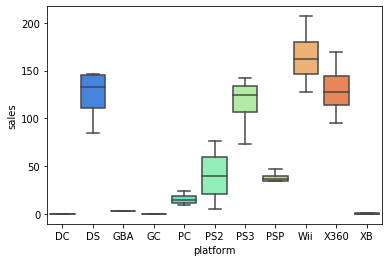

In [34]:
sns.boxplot(x='platform', y='sales', data=sales_platform, palette='rainbow');

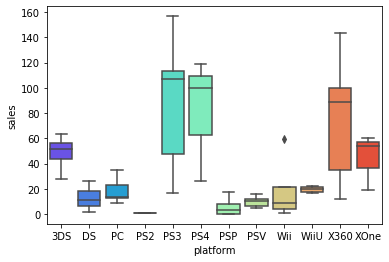

In [35]:
sns.boxplot(x='platform', y='sales', data=sales_platform_forecast, palette='rainbow')

Видим по данным графикам, что 
1. Данные распределены неравномерно, но нормально
2. PS2 уступает в новом периоде PS3
3. Появляется XOne с хорошей пермпективой к росту
4. Среднее значение в новом периоде стремится к верхним значениям - это показатель роста продаж в перспективе  
 
Разница между платформами оправдана выходом новых версий -  
 PS2 уступает популярности PS3, как своей новой версии.  
  Новые платформы проводят более качественные маркетинговые\рекламные кампании,  
   что позволяет привлечь аудиторию

Найдем самую популярную платформу за все время

In [36]:
df_grouped = df.pivot_table(index='platform', values='sales', aggfunc=('sum'))
df_grouped.sort_values(by='sales', ascending=False).head(10)

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Рассмотрим PS2 как самую популярную платформу -  
 рассмотрим на ее примере корреляцию между продажами и оценками пользователей и критиков

In [37]:
df_ps2 = df[(df['platform'] == 'PS2')]
ps2_filtred = df_ps2[['critic_score', 'user_score', 'sales']]
ps2_filtred 

,critic_score,user_score,sales
17,95.0,9.0,20.81
24,95.0,8.7,16.15
28,95.0,8.4,14.97
38,97.0,8.5,13.10
48,89.0,8.5,11.65
...,...,...,...
16670,NaN,NaN,0.01
16671,NaN,NaN,0.01
16683,NaN,NaN,0.01
16689,NaN,NaN,0.01


In [38]:
print('Коэффициент корреляции между продажами и оценкой критиков:', df_ps2['sales'].corr(df_ps2['critic_score']))
print('Коэффициент корреляции между продажами и оценкой игроков:', df_ps2['sales'].corr(df_ps2['user_score'].replace('tbd', np.nan).astype(float)))

Коэффициент корреляции между продажами и оценкой критиков: 0.39253647544509
Коэффициент корреляции между продажами и оценкой игроков: 0.1750550277038374


Корреляция у нас положительная (прямая) - то есть чем выше оценка тем выпе продажи.  
 И все же, при этом для показателя с оценкой игроков она очень слабая и слабая для оценки критикам -  
  это значит, что на итоговые продажи не оказывают особого никакие оценки.

Добавим столбец 'year_of_release' - чтобы в будущем по нему оценить продажи PS2

In [39]:
df_ps2_2 = df[(df['platform'] == 'PS2')]
ps2_filtred_2 = df_ps2[['critic_score', 'user_score', 'sales', 'year_of_release']]
ps2_filtred_2 

,critic_score,user_score,sales,year_of_release
17,95.0,9.0,20.81,2004
24,95.0,8.7,16.15,2002
28,95.0,8.4,14.97,2001
38,97.0,8.5,13.10,2001
48,89.0,8.5,11.65,2004
...,...,...,...,...
16670,NaN,NaN,0.01,2008
16671,NaN,NaN,0.01,2008
16683,NaN,NaN,0.01,2008
16689,NaN,NaN,0.01,2008


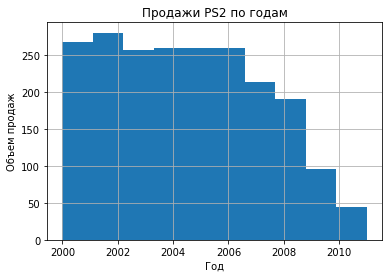

In [40]:
df_ps2_2.hist('year_of_release', bins = 10)
plt.title('Продажи PS2 по годам')
plt.xlabel('Год')
plt.ylabel('Объем продаж');

PS2 появилась на рынке в 2000 году  
 продажи были хороши и удерживались до конца 2006 года -  
   когда в свет вышла PS3

Сравним данные по продажам на платформе PS2 и X360, как вторая по популярноси платформа 

In [41]:
df_X360 = df[(df['platform'] == 'X360')]
X360_filtred = df_X360[['critic_score', 'user_score', 'sales']]
X360_filtred 

,critic_score,user_score,sales
14,61.0,6.3,21.82
23,97.0,8.1,16.27
29,88.0,3.4,14.73
32,87.0,6.3,14.62
35,83.0,4.8,13.68
...,...,...,...
16613,49.0,2.1,0.01
16622,NaN,NaN,0.01
16647,NaN,NaN,0.01
16654,NaN,5.1,0.01


In [42]:
print('Коэффициент корреляции между продажами и оценкой критиков:', df_X360['sales'].corr(df_X360['critic_score']))
print('Коэффициент корреляции между продажами и оценкой игроков:', df_X360['sales'].corr(df_X360['user_score'].replace('tbd', np.nan).astype(float)))

Коэффициент корреляции между продажами и оценкой критиков: 0.3928658925400697
Коэффициент корреляции между продажами и оценкой игроков: 0.11418661214018044


Корреляция и здесь у нас положительная (прямая) - то есть чем выше оценка тем выпе продажи.  
 И все же, при этом для показателя с оценкой игроков она очень слабая и слабая для оценки критикам -  
  это значит, что на итоговые продажи не оказывают особого никакие оценки.  
   В данном случае оценка игроков практически не учитывается - значение стремится к 0

Достроим столбец с суммарными продажами и посмотри на графике как они были распределены

In [43]:
df_X360_2 = df[(df['platform'] == 'X360')]
X360_filtred_2 = df_X360[['critic_score', 'user_score', 'sales', 'year_of_release']]
X360_filtred_2 

,critic_score,user_score,sales,year_of_release
14,61.0,6.3,21.82,2010
23,97.0,8.1,16.27,2013
29,88.0,3.4,14.73,2011
32,87.0,6.3,14.62,2010
35,83.0,4.8,13.68,2012
...,...,...,...,...
16613,49.0,2.1,0.01,2012
16622,NaN,NaN,0.01,2007
16647,NaN,NaN,0.01,2011
16654,NaN,5.1,0.01,2013


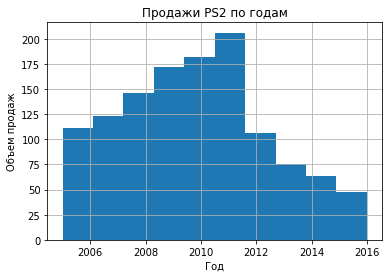

In [44]:
df_X360.hist('year_of_release', bins = 10)
plt.title('Продажи PS2 по годам')
plt.xlabel('Год')
plt.ylabel('Объем продаж');

X360 стремительно растет в продажах с года релиза (2005)

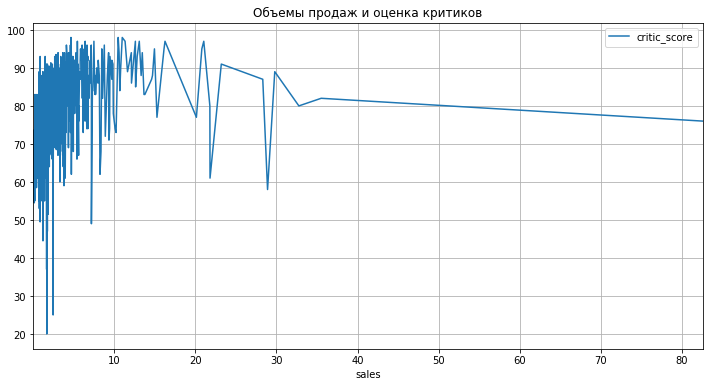

In [45]:
sales_by_critic = (df.pivot_table(index=['sales'], values=['critic_score'])
                   .sort_values(by='sales')).reset_index()

sales_by_critic.plot(x='sales', y='critic_score', style='-', title='Объемы продаж и оценка критиков', grid=True,  figsize=(12, 6));

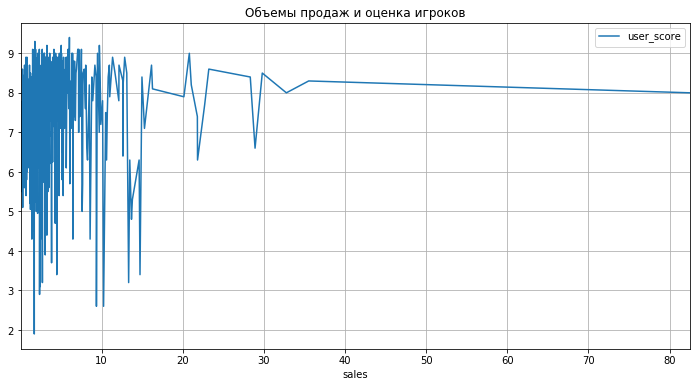

In [46]:
sales_by_user = (df.pivot_table(index=['sales'], values=['user_score'])
                   .sort_values(by='sales')).reset_index()

sales_by_user.plot(x='sales', y='user_score', style='-', title='Объемы продаж и оценка игроков', grid=True,  figsize=(12, 6));

Мы посторили графики зависимоти продаж от оценок критиков и игроков.  
 По ним видим :  
графики весьма шумные - тут видно. что высокие оценки дают хорошие продажи и в тоже время взаимосвязь слабая

Познакомимся с жанрами 

In [47]:
sales_genre = df.query('2000 < year_of_release < 2012').reset_index()
sales_genre.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
5,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
6,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
7,11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
8,13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
9,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [48]:
sales_genre = sales_genre.pivot_table(index=['genre', 'year_of_release'], values='sales', aggfunc=('sum')).reset_index()
sales_genre.head(10)

,genre,year_of_release,sales
0,Action,2001,59.38
1,Action,2002,86.65
2,Action,2003,67.98
3,Action,2004,76.13
4,Action,2005,85.39
5,Action,2006,66.06
6,Action,2007,104.85
7,Action,2008,134.96
8,Action,2009,137.69
9,Action,2010,115.29


In [49]:
sales_genre.sort_values(by='sales', ascending = False).head(10)

,genre,year_of_release,sales
8,Action,2009,137.69
118,Sports,2009,137.37
115,Sports,2006,135.78
7,Action,2008,134.96
10,Action,2011,116.68
9,Action,2010,115.29
6,Action,2007,104.85
98,Shooter,2011,98.18
116,Sports,2007,97.73
42,Misc,2010,95.14


Видим, что по объемам продаж преобладает жанр Action, проверим 

In [50]:
sales_genre_grouped = sales_genre.pivot_table(index='genre', values='sales', aggfunc=('sum'))
sales_genre_grouped.sort_values(by='sales', ascending=False).head(10)

,sales
genre,
Action,1051.06
Sports,908.61
Misc,617.76
Shooter,601.14
Role-Playing,509.37
Racing,487.56
Platform,417.37
Simulation,296.92
Fighting,247.15


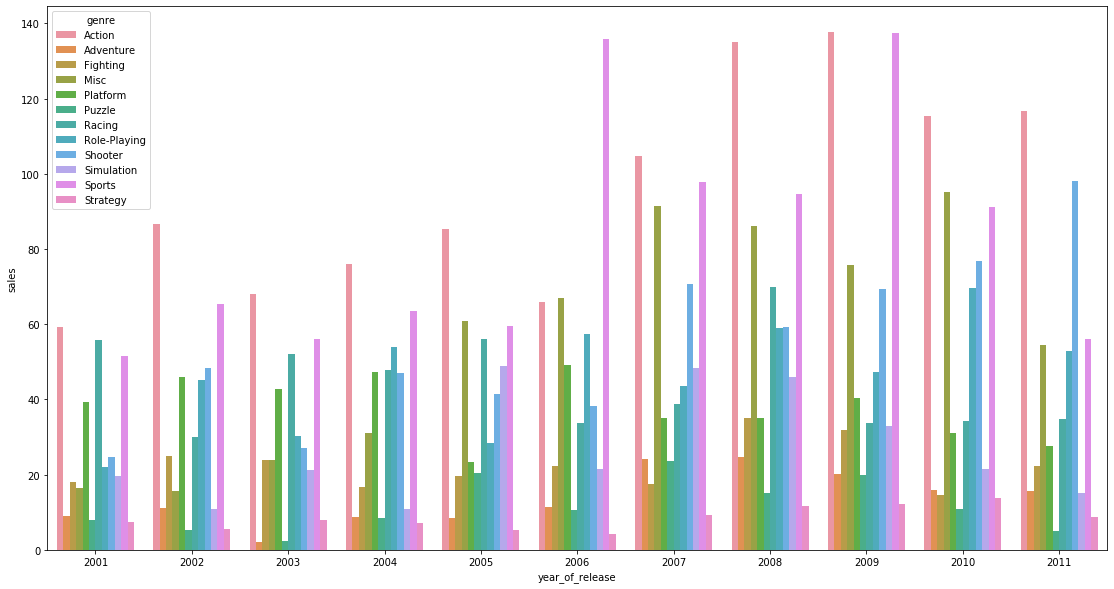

In [51]:
plt.figure(figsize=(19,10))
sns.barplot(x='year_of_release', y='sales', hue='genre', data=sales_genre)

И графиком подтверждаем, что самый топовый жанр - это Action.  
 Стоит так же учесть, что производство игр в жанрах Action или Shooter  
  обходится сильно дороже, чем производство Puzzle-игр.

##### Вывод по исследовательскому анализу данных  : 
1. Выяснили, что рост продаж активно начинается с начала 2000х
2. Максимальные продажи приходятся на 2011 год - выход из кризиза , возможно , пользователи решили уйти от реальности
3. Нашли самую популярную платоформу - ей оказалась PS2 
4. Вычислили самый популярный жанр - Action
5. Определили, что на продажи прямо не оказывают влияние отзывы ни критиков, ни пользователей 

<a id='4-bullet'></a>

### Шаг 4. Составим портрет пользователя каждого региона

Вспомним наши данные со столбцом суммы

In [52]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Посчитаем доли продаж для каждого региона в актуальном периоде (2010 - 2016 гг) 

In [53]:
df_2 = df.query('2010 < year_of_release < 2016')
df_2.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [54]:
rating_sales = df_2.pivot_table(index='platform', 
                                       values=['eu_sales', 'jp_sales', 'na_sales', 'sales'],
                                       aggfunc=('sum'))
rating_sales['eu_sales'] = rating_sales['eu_sales']*100/rating_sales['sales']
rating_sales['jp_sales'] = rating_sales['jp_sales']*100/rating_sales['sales']
rating_sales['na_sales'] = rating_sales['na_sales']*100/rating_sales['sales']

rating_sales.reset_index(inplace=True)
rating_sales.sort_values(by='sales', ascending=False).head()

,platform,eu_sales,jp_sales,na_sales,sales
4,PS3,36.617870,10.880829,37.918863,441.97
10,X360,30.721111,0.884232,59.681677,378.86
5,PS4,44.636367,4.173302,35.628241,244.89
0,3DS,24.288128,38.154696,32.352578,242.67
11,XOne,31.508598,0.247804,59.210032,133.17


Вывод по интересам к платформам и регионам:
1. Больше всего игроков в Северной америке
2. Меньше всего игроков в Японии
3. Наибольшие продажи по сумме у PS3  
 Интересно, что PS4 вышла в 2013, имеет успех у европейских игроков, но продажи суммарные не перебивает у сташего поколения

In [55]:
rating_sales = df_2.pivot_table(index='genre', 
                                       values=['eu_sales', 'jp_sales', 'na_sales', 'sales'],
                                       aggfunc=('sum'))
rating_sales['eu_sales'] = rating_sales['eu_sales']*100/rating_sales['sales']
rating_sales['jp_sales'] = rating_sales['jp_sales']*100/rating_sales['sales']
rating_sales['na_sales'] = rating_sales['na_sales']*100/rating_sales['sales']

rating_sales.reset_index(inplace=True)
rating_sales.sort_values(by='sales', ascending=False).head()

,genre,eu_sales,jp_sales,na_sales,sales
0,Action,35.710360,10.716519,42.000038,527.69
8,Shooter,36.228029,2.977872,48.860676,364.69
7,Role-Playing,25.508903,32.209277,34.244889,227.45
10,Sports,35.790508,4.759899,47.346251,213.66
3,Misc,28.548458,12.103494,50.380061,136.82


Вывод по жанрам и регионам:
1. Action и Shooter как наиболее рейтинговые жанры и популярны больше у североамериканских игроков.   
2. Role-Playing популярны в Японии и Северной Америке  
3. Sports популярен у североамериканских и европейских игроков
4. Misc невероятно популярны у североамериканских игроков

In [56]:
#df_3 = df_2.query('rating != "Nan" ')
#df_3.head(10)

df_2['rating']=df_2['rating'].fillna('unknown')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3520 entries, 16 to 16707
Data columns (total 12 columns):
name               3520 non-null object
platform           3520 non-null object
year_of_release    3520 non-null Int64
genre              3520 non-null object
na_sales           3520 non-null float64
eu_sales           3520 non-null float64
jp_sales           3520 non-null float64
other_sales        3520 non-null float64
critic_score       1580 non-null float64
user_score         1770 non-null float64
rating             3520 non-null object
sales              3520 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 360.9+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [57]:
#df_3.info()

In [58]:
rating_sales = df_2.pivot_table(index='rating', 
                                       values=['eu_sales', 'jp_sales', 'na_sales', 'sales'],
                                       aggfunc=('sum'))
rating_sales['eu_sales'] = rating_sales['eu_sales']*100/rating_sales['sales']
rating_sales['jp_sales'] = rating_sales['jp_sales']*100/rating_sales['sales']
rating_sales['na_sales'] = rating_sales['na_sales']*100/rating_sales['sales']

rating_sales.reset_index(inplace=True)
rating_sales.sort_values(by='sales', ascending=False).head()

,rating,eu_sales,jp_sales,na_sales,sales
3,M,37.265597,4.011380,46.457819,636.19
0,E,35.221331,9.775795,44.635769,365.29
6,unknown,27.901537,34.094453,29.939853,359.12
5,T,32.236177,13.410317,43.294842,237.28
1,E10+,33.706820,4.805137,51.173605,225.80


Вывод по рейтингу и регионам:
1. Продажи при рейтинге меняются , значит определеное влияние рейтинг все же оказывает 
2. По данным вывода получаем, что рейтинг M наиболее востребован - самые большие продажи
3. Неизвестный рейтинг входит в топ-3 по реализации - еще раз убеждаемся, что рейтинг не оказывает значительного влияния на продажи 

##### Вывод портретам пользователей в каждом регионе : 
1. Европейские игроки 
 - по количеству их меньше , чем североамериканских
 - предпочитают всегда все самое новое - поэтому в топе PS4 и PS3
 - популярные жанры Shooter и Action
 - трепетны к рейтингам, особенно М
2. Североамериканские игроки
 - превосходят всех количеством 
 - предпочитают патриотично ХBox в разных его поколениях
 - предпочитают жанры Misc и Shooter
 - очень щепетильны к рейтингам, особенно E10+
3. Японские игроки
 - их наименьшее количество 
 - предпочитают свою родную 3DS
 - предпочитаю отличный от других жанр Role-Playing
 - равнодушны к рейтингам, но ценят чуть больше T
  
   
   Общий вывод такой, что по регионам больше заметна патриотичная привязка -  
    ХBox - больше американская история (производитель - Microsoft), Nintendo DS - японская  
     PS3 - это от Sony - такая родная всем европейцам японская классика

<a id='5-bullet'></a>

### Шаг 5. Проверим  гипотезы

Рассмотрим и проверим гипотезы
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
 - Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые

In [59]:
xbox_user_score = df_2[df_2['platform'] == 'XOne']['user_score'].reset_index(drop=True)
pc_user_score = df_2[df_2['platform'] == 'PC']['user_score'].reset_index(drop=True)

In [60]:
print(f'Дисперсия выборки для платформы "Xbox One" {round(np.var(xbox_user_score, ddof=1),2)}')
print(f'Дисперсия выборки для платформы "PC" {round(np.var(pc_user_score, ddof=1),2)}')

Дисперсия выборки для платформы "Xbox One" 1.66
Дисперсия выборки для платформы "PC" 2.53


Мы используем статистический критерий Стьюдента, 
потому что данные у нас количественные, распределение нормальное,  
 сравниваем две выборки, выборки независимые.  
  equal_var=False, так как дисперсию считаем из разных совокупностей данных и дисперсии не близки по значениям

In [61]:
st.ttest_ind(xbox_user_score, pc_user_score, equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

Видим, что у нас есть пустые значения - проигнорируем их с помощью nan_policy

In [62]:
alpha = 0.05

results = st.ttest_ind(
    xbox_user_score, 
    pc_user_score,
    nan_policy ='omit')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.996872317609512
Не получилось отвергнуть нулевую гипотезу


Получаем подтверждение нулевой гипотезы-  
 средние пользовательские рейтинги платформ Xbox One и PC  действительно одинаковые

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Нулевая гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
 - Альтернативная гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые 
    

In [63]:
action_user_score = df_2[df_2['genre'] == 'Action']['user_score'].reset_index(drop=True)
sports_user_score = df_2[df_2['genre'] == 'Sports']['user_score'].reset_index(drop=True)

In [64]:
print(f'Дисперсия выборки для жанра "Action" {round(np.var(action_user_score, ddof=1),2)}')
print(f'Дисперсия выборки для жанра "Sports" {round(np.var(sports_user_score, ddof=1),2)}')

Дисперсия выборки для жанра "Action" 1.76
Дисперсия выборки для жанра "Sports" 2.66


Аналогично используем статистический критерий Стьюдента, 
потому что данные у нас количественные, распределение нормальное,  
 сравниваем две выборки, выборки независимые.  
  equal_var=False, так как дисперсию считаем из разных совокупностей данных и дисперсии не близки по значениям

In [65]:
st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

Видим, что у нас есть пустые значения - проигнорируем их с помощью nan_policy

In [66]:
alpha = 0.05

results = st.ttest_ind(
    action_user_score, 
    sports_user_score,
    nan_policy ='omit')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.42877026307616e-21
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports одинаковые

<a id='6-bullet'></a>

### Общий вывод

Рассмотрев такой интересный массив данных на столь интересную тему, мы можем сделать следующие выводы:
1. Платформа, на которой продавалось максимальное количество игр - PS2 - долго держалась в лидерах
2. Самый интересный жанр для игроков это Action - что неудивительно - так как культура видеоигр подразумевает уход от реальности.
3. К п.2 можно добавить, что, например, составить портреты игроков мы высчитали, что североамериканцы любят и пострелять,  
 к тому же играют много - что , предположу, оказывает влияние и на социальные процессы в их обществе
4. Да, североамериканцы много играют возможно еще и по тому, что непосредственно одни из самых топовых разработчиков находятся именно в штатах: один из лидеров пользования - платформа Xbox (производитель - Microsoft, Силиконовая долина, штат Калифорния)
5. Мы высчитали , что ни рейтинги по оценкам критиков, ни рейтинги по оценкам игроков не оказываю влияния на количество продаж.
6. В разные исторические периоды объемы продаж были разными - в период после кризиса - продажи упали
7. Вычислили тенденцию к росту продаж на перспективу 
   #### Таким образом, составляющие успешной игры:  
   
 -  Жанр Action 
 -  Мощная платформа для реализации (японская или американская,  проверенная временем)
 - Рейтинг  ESRB тоже нужен для успешной реализации
 - Никуда не уйти от крутого контента самой игры (артов, движков, интерфейсов)  